## PANDAS 연습 - EDA

In [191]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline

df = pd.read_csv("C:/Users/sohee/Downloads/archive (1)/Mall_Customers.csv")

In [22]:
# 데이터셋 확인

print('\n')
print(df.head(3))
print("\n-------------------------------------------------\n")
print(df.info())
print("\n-------------------------------------------------\n")
print(df.describe())



   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6

-------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

-------------------------------------------------

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.00

## 시각화

**핵심 코드**

array to list 👉🏻 .tolist()

In [105]:
# Matplotlib 한글 깨짐 해결 - 출처 : https://velog.io/@seonj102/jupyter-notebook-%EA%B7%B8%EB%9E%98%ED%94%84-%ED%95%9C%EA%B8%80-%ED%8F%B0%ED%8A%B8-%EC%84%A4%EC%A0%95

# 파이썬 시각화 패키지 불러오기
import matplotlib.pyplot as plt
%matplotlib inline


# 사용자 운영체제 확인
import platform
platform.system()

# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

### 성별 분포

해석: 여성보다 남성 구매 데이터가 더 많다.

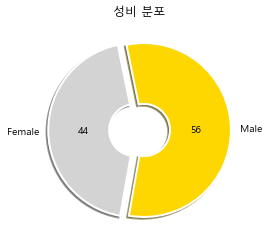

In [106]:
# 성별 분포

target = df['Gender']


ratio = [target.value_counts()['Female'], target.value_counts()['Male']]
labels = target.unique().tolist()

explode = [0.05, 0.05]
colors = ['gold', 'lightgray']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 2}

plt.pie(ratio, labels=labels, explode=explode, 
        shadow=True, colors=colors, startangle=260, autopct='%.f',
        wedgeprops=wedgeprops);
plt.title("성비 분포");

### 성별에 따른 연령 분포


            CustomerID  Annual Income (k$)  Spending Score (1-100)  Ages
Gender Age                                                              
Female 18            1                   1                       1     1
       19            2                   2                       2     2
       20            2                   2                       2     2
       21            4                   4                       4     4
       22            2                   2                       2     2
...                ...                 ...                     ...   ...
Male   66            1                   1                       1     1
       67            3                   3                       3     3
       68            1                   1                       1     1
       69            1                   1                       1     1
       70            2                   2                       2     2

[87 rows x 4 columns]

---------------------------

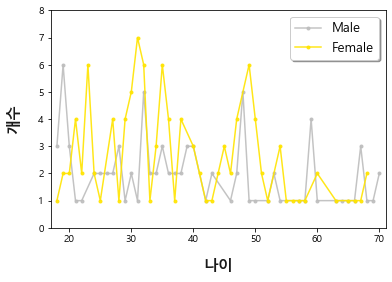

In [264]:
print(df.groupby([df['Gender'],df['Age']]).count())

print('\n----------------------------------\n')


def MakeDF(target, color):
    tg_df = pd.DataFrame(df[df['Gender']==target]['Age'].value_counts()).sort_index()
    x_labels = tg_df.index
    y_labels = tg_df['Age']
    plt.plot(x_labels, y_labels, label=target, color=color, alpha=0.9, marker='.')


font = {'color': '#191919',
       'size': 15,
       'weight': 'bold'}

MakeDF('Male', '#BDBDBD')
MakeDF('Female', '#FFE400')


plt.xlabel('나이', labelpad=15, fontdict=font, loc='center')
plt.ylabel('개수', labelpad=15, fontdict=font)
plt.legend(ncol=1, fontsize=13, shadow=True)
plt.axis([17, 71, 0, 8]) # X, Y축의 범위: [xmin, xmax, ymin, ymax

plt.show()

### 연령이 다양하게 분포하므로, 연령대로 범주화

**핵심 코드**

소수점 내림 👉🏻 math.floor(x)

소수점 올림 👉🏻 math.ceil(x)

In [267]:
import math

df['Ages'] = df['Age'].apply(lambda x: math.floor(x*0.1)*10)

df.Ages.head(3)

0    10
1    20
2    20
Name: Ages, dtype: int64